In [4]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cftime
import rioxarray

#### Other than changing the path, You only need to change scenario name to generate files for different scenarios

In [46]:
path = '/glade/u/home/xiaojuan/Data/CMIP6/ScenarioMIP/NCAR/CESM2/'
model = 'CESM2'
scenario = "ssp585"  # CHANGE SCENARIO HERE
data_folder = scenario+'/r10i1p1f1/Lmon/burntFractionAll/gn/latest/'
filename = 'burntFractionAll_Lmon_CESM2_'+scenario+'_r10i1p1f1_gn_201501-206412.nc'
file = path + data_folder + filename
print(file)

/glade/u/home/xiaojuan/Data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585/r10i1p1f1/Lmon/burntFractionAll/gn/latest/burntFractionAll_Lmon_CESM2_ssp585_r10i1p1f1_gn_201501-206412.nc


In [35]:
dset = xr.open_dataset(file, decode_times=True, use_cftime=True)
# dset = dset.sortby(["time", "lat", "lon"]) # THIS SOLVED THE PROBLEM
dset.rio.write_crs("4326", inplace=True)  # Give it georeference system
dset = dset.rename({'lat':'y', 'lon':'x'})

/glade/work/xiaojuan/conda-envs/cmip6_plot_xjliu/lib/python3.11/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'burntFractionAll' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [56]:
# Take the climatological monthly mean of every decade
# and save it to Geotiff format
for decade in range(1, 6):
    mean_fire = dset.isel(time=slice(12*10*(decade-1), 12*10*decade)) \
                ['burntFractionAll'].groupby('time.month').mean('time')

    yearStart = 2015+10*(decade-1)
    yearEnd = 2014+10*(decade)
    for imon in range(1,13): # save each month into an individual file
        foutname = "wildfire-" + model +'-'+scenario+ \
                    "-Year"+str(yearStart)+"_"+str(yearEnd)+ \
                    "-Month"+str(imon)+".tif"
        mean_fire[imon-1].rio.to_raster(foutname, driver="GTiff", compress="LZW")

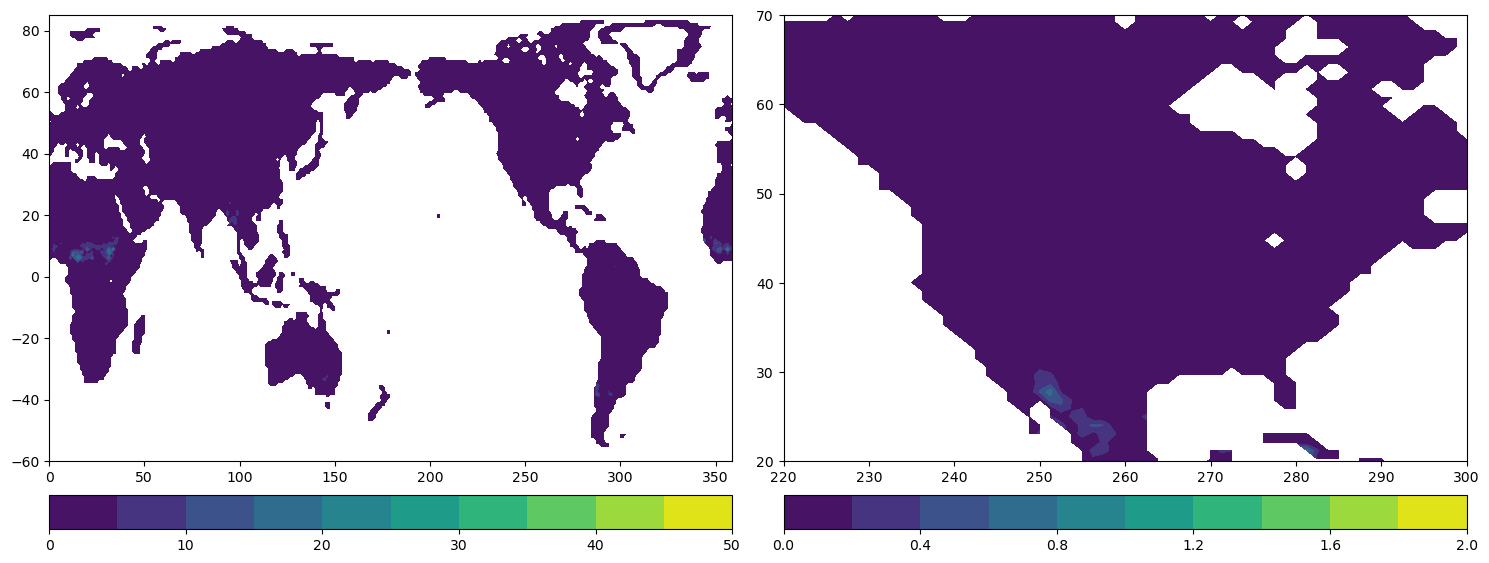

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

MON=1

im1 = ax1.contourf(dset.x, dset.y, mean_fire[MON, :, :],
                   levels=np.linspace(0, 50, 11))
ax1.set_ylim([-60, 85])
fig.colorbar(im1, ax=ax1, orientation='horizontal', pad=.06)

im2 = ax2.contourf(dset.x, dset.y, mean_fire[MON, :, :], 
                   levels=np.linspace(0, 2, 11))
ax2.set_xlim([220, 300])
ax2.set_ylim([20, 70])
fig.colorbar(im2, ax=ax2, orientation='horizontal', pad=0.06)

plt.tight_layout()

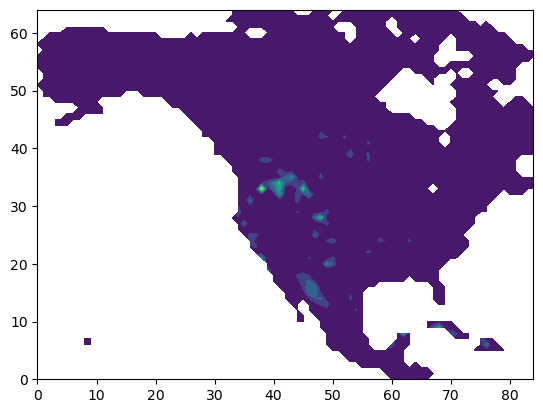

In [50]:
plt.contourf(mean_fire[8,110:175,155:240])